# Number of provinces (leetcode)
- 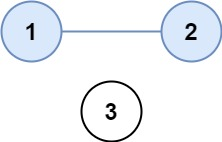

In [10]:
# Better Approach
# Time Complexity : O(N) + O(V+2E)

def BFSTraversal(isConnected, node, visited):
    queue = [node]
    visited[node] = 1
    while len(queue) > 0:
        node = queue.pop(0)
        for i in range(len(isConnected[node])):
            if i != node and isConnected[node][i]== 1 and visited[i] == 0:
                queue.append(i)
                visited[i] = 1


def findCircleNum(isConnected):
    n = len(isConnected)
    visited = [0 for i in range(n)]
    province = 0
    for v in range(n):
        if visited[v] == 0:
            BFSTraversal(isConnected, v, visited)
            province += 1
    return province

isConnected = [[1,1,0],[1,1,0],[0,0,1]]
findCircleNum(isConnected)

2

In [6]:
def DFSTraversal(isConnected, node, visited):
    visited[node] = 1

    for i in range(len(isConnected[node])):
        if node != i and isConnected[node][i] == 1 and visited[i] == 0:
            DFSTraversal(isConnected, i, visited)


def findCircleNum(isConnected):
    n = len(isConnected)
    visited = [0 for i in range(n)]
    province = 0
    for v in range(n):
        if visited[v] == 0:
            DFSTraversal(isConnected, v, visited)
            province += 1
    return province

isConnected = [[1,1,0],[1,1,0],[0,0,1]]
findCircleNum(isConnected)

2

# Rotting Oranges
- 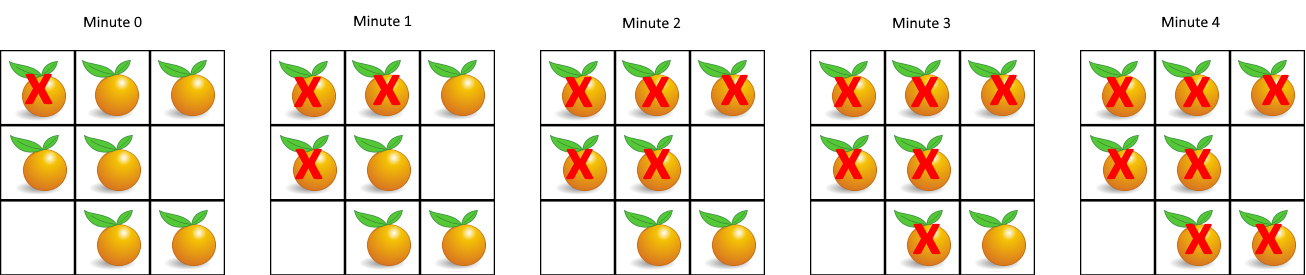

In [9]:

def BFSRotting(grid, queue, n, m):
    totalTime = 0
    while len(queue) > 0:
        size = len(queue)
        time = 0
        for x in range(size):
            i, j = queue.pop(0)
            
            if 0 <= j-1 < m and grid[i][j-1] != 0:
                queue.append((i, j-1))
                grid[i][j-1] = 0
                time = 1
            if 0 <= j+1 < m and grid[i][j+1] != 0:
                queue.append((i, j+1))
                grid[i][j+1] = 0
                time = 1
            if 0 <= i-1 < n and grid[i-1][j] != 0:
                queue.append((i-1,j))
                grid[i-1][j] = 0
                time = 1
            if 0 <= i+1 < n and grid[i+1][j] != 0:
                queue.append((i+1, j))
                grid[i+1][j] = 0
                time = 1
        totalTime += time
    for i in range(n):
        if sum(grid[i]) != 0:
            return -1
    return totalTime

def orangesRotting(grid):
    n = len(grid)
    m = len(grid[0])
        
    queue = []
    for i in range(n):
        for j in range(m): 
            if grid[i][j] == 2:
                queue.append((i, j))
                grid[i][j] = 0

    return BFSRotting(grid, queue, n, m)


grid = [[2,1,1],[1,1,0],[0,1,1]]
orangesRotting(grid)

4

# Flood fill
- 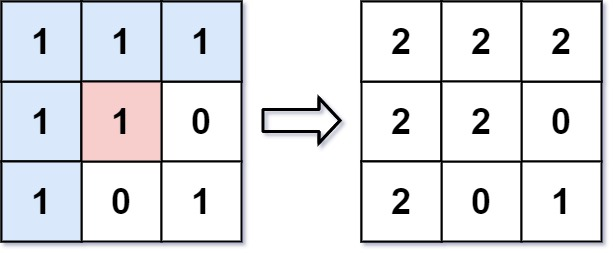

In [12]:
def floodFill(image, sr, sc, color):
    n = len(image)
    m = len(image[0])

    visited = [[0 for i in range(m)] for j in range(n)]
    queue = [(sr, sc)]
    init = image[sr][sc]
    image[sr][sc] = color
    visited[sr][sc] = 1

    while len(queue) > 0:
        i, j = queue.pop(0)
        if 0 <= i-1 < n and visited[i-1][j] == 0 and image[i-1][j] == init:
            queue.append((i-1, j))
            image[i-1][j] = color
            visited[i-1][j] = 1
        if 0 <= i+1 < n and visited[i+1][j] == 0 and image[i+1][j] == init:
            queue.append((i+1, j))
            image[i+1][j] = color
            visited[i+1][j] = 1
        if 0 <= j-1 < m and visited[i][j-1] == 0 and image[i][j-1] == init:
            queue.append((i, j-1))
            image[i][j-1] = color
            visited[i][j-1] = 1
        if 0 <= j+1 < m and visited[i][j+1] == 0 and image[i][j+1] == init:
            queue.append((i, j+1))
            image[i][j+1] = color
            visited[i][j+1] = 1

    return image
image = [[1,1,1],[1,1,0],[1,0,1]]
sr = 1
sc = 1
color = 2
floodFill(image, sr, sc, color)

[[2, 2, 2], [2, 2, 0], [2, 0, 1]]

In [14]:

def dfsTraversal(image, i, j, visited, n, m, init, color):
    if 0 <= i < n and 0 <= j < m and visited[i][j] == 0 and image[i][j] == init:
        visited[i][j] = 1
        image[i][j] = color
        dfsTraversal(image, i-1, j, visited, n, m, init, color)
        dfsTraversal(image, i+1, j, visited, n, m, init, color)
        dfsTraversal(image, i, j-1, visited, n, m, init, color)
        dfsTraversal(image, i, j+1, visited, n, m, init, color)
        return

def floodFill(image, sr, sc, color):
    n = len(image)
    m = len(image[0])
    init = image[sr][sc]
    visited = [[0 for j in range(m)] for i in range(n)]
    dfsTraversal(image, sr, sc, visited, n, m, init, color)
    return image
    
image = [[1,1,1],[1,1,0],[1,0,1]]
sr = 1
sc = 1
color = 2
floodFill(image, sr, sc, color)

[[2, 2, 2], [2, 2, 0], [2, 0, 1]]

# Undirected Graph Cycle
- 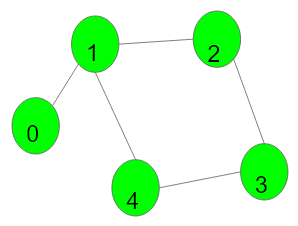

In [32]:
# DFS

def dfsTraversal(adj, node, parentNode, visited):
    if visited[node] == 1:
        return True
    
    visited[node] = 1
        
    isBool = False
    for i in adj[node]:
        if i != parentNode:
            isBool = isBool or dfsTraversal(adj, i, node, visited)
            if isBool:
                return isBool
    return isBool
    
def isCycle(V, adj):
    visited = [0 for i in range(V)]
    
    for i in range(V):
        if visited[i] == 0 and dfsTraversal(adj, i, -1, visited):
            return True
    return False

adj = [[1], [0,2,4], [1,3], [2,4], [1,3]] 
isCycle(5, adj)

True

In [36]:
# BFS

def bfsTraversal(adj, node, visited):
        
    queue = [node]
    while len(queue) > 0:
        node = queue.pop(0)
        if visited[node] == 1:
            return True
        visited[node] = 1
        for i in  adj[node]:
            if visited[i] == 0:
                queue.append(i)
    return False
    
def isCycle(V, adj):
    visited = [0 for i in range(V)]
    
    for i in range(V):
        if visited[i] == 0 and bfsTraversal(adj, i, visited):
            return True
    return False

adj = [[1], [0,2,4], [1,3], [2,4], [1,3]] 
isCycle(5, adj)

True

# 01 Matrix
- 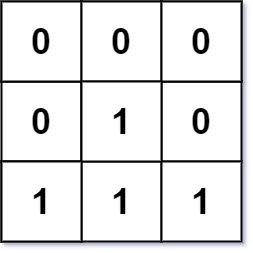
- Output: [[0,0,0],[0,1,0],[1,2,1]]

In [7]:
def bfsTraversal(mat, distance, queue, n, m):

    totalDistance = 0

    while len(queue) > 0:
        size = len(queue)
        for i in range(size):
            x, y = queue.pop(0)

            if 0 <= x-1 < n and mat[x-1][y] != 0:
                queue.append((x-1, y))
                distance[x-1][y] = distance[x][y] + 1
                mat[x-1][y] = 0
            if 0 <= x+1 < n and mat[x+1][y] != 0:
                queue.append((x+1, y))
                distance[x+1][y] = distance[x][y] + 1
                mat[x+1][y] = 0
            if 0 <= y-1 < m and mat[x][y-1] != 0:
                queue.append((x, y-1))
                distance[x][y-1] = distance[x][y] + 1
                mat[x][y-1] = 0      
            if 0 <= y+1 < m and mat[x][y+1] != 0:
                queue.append((x, y+1))
                distance[x][y+1] = distance[x][y] + 1
                mat[x][y+1] = 0           
                

def updateMatrix(mat):
    n = len(mat)
    m = len(mat[0])

    queue = []
    for i in range(n):
        for j in range(m):
            if mat[i][j] == 0:
                queue.append((i, j))

    distance = [[0 for j in range(m)] for i in range(n)]
    bfsTraversal(mat, distance, queue, n, m)

    return distance

mat = [[0,0,0],[0,1,0],[1,1,1]]
updateMatrix(mat)

[[0, 0, 0], [0, 1, 0], [1, 2, 1]]

# Surrounded Regions
- 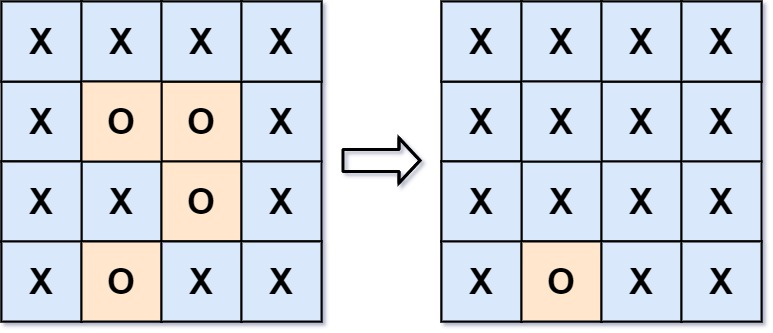

In [15]:


def boundaryTraversal(board, n, m, queue, visited):

    if n == 1:
        for j in range(m):
            if board[0][j] == 'O':
                queue.append((0, j))
                visited[0][j] = 1
        return
    if m == 1:
        for i in range(n):
            if board[i][0] == 'O':
                queue.append((i, 0))
                visited[i][0] = 1
        return

    for j in range(m):
        if board[0][j] == 'O':
            queue.append((0, j))
            visited[0][j] = 1
        if board[n-1][j] == 'O':
            queue.append((n-1, j))
            visited[n-1][j] = 1
        
    for i in range(1, n-1):
        if board[i][0] == 'O':
            queue.append((i, 0))
            visited[i][0] = 1
        if board[i][m-1] == 'O':
            queue.append((i, m-1))
            visited[i][m-1] = 1

def bfsTraversal(board, visited, queue, n, m):

    while len(queue) > 0:
        x, y = queue.pop(0)

        if 0 <= x-1 < n and visited[x-1][y] == 0 and board[x-1][y] != 'X':
            queue.append((x-1, y))
            visited[x-1][y] = 1 
        if 0 <= x+1 < n and visited[x+1][y] == 0 and board[x+1][y] != 'X':
            queue.append((x+1, y))
            visited[x+1][y] = 1
        if 0 <= y-1 < m and visited[x][y-1] == 0 and board[x][y-1] != 'X':
            queue.append((x, y-1))
            visited[x][y-1] = 1
        if 0 <= y+1 < m and visited[x][y+1] == 0 and board[x][y+1] != 'X':
            queue.append((x, y+1))
            visited[x][y+1] = 1

def solve(board):
    n = len(board)
    m = len(board[0])
    queue = []

    visited = [[0 for j in range(m)] for i in range(n)]
    boundaryTraversal(board, n, m, queue, visited)
    # print(visited)
        
    bfsTraversal(board, visited, queue, n, m)
        
    for i in range(n):
        for j in range(m):
            if visited[i][j] == 0:
                board[i][j] = 'X'


board = [["X","X","X","X"],["X","O","O","X"],["X","X","O","X"],["X","O","X","X"]]
solve(board)
board

[['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'O', 'X', 'X']]

In [19]:
def boundaryTraversal(board, n, m, visited):

    if n == 1:
        for j in range(m):
            dfsTraversal(board, 0, j, visited, n, m)
        return
    if m == 1:
        for i in range(n):
            dfsTraversal(board, i, 0, visited, n, m)
        return

    for j in range(m):
        dfsTraversal(board, 0, j, visited, n, m)
        dfsTraversal(board, n-1, j, visited, n, m)
        
    for i in range(1, n-1):
        dfsTraversal(board, i, 0, visited, n, m)
        dfsTraversal(board, i, m-1, visited, n, m)

def dfsTraversal(board, x, y, visited, n, m):
    if x < 0 or x >= n or y < 0 or y >= m or visited[x][y] == 1 or board[x][y] == 'X':
        return
    visited[x][y] = 1

    dfsTraversal(board, x-1, y, visited, n, m)
    dfsTraversal(board, x+1, y, visited, n, m)
    dfsTraversal(board, x, y-1, visited, n, m)
    dfsTraversal(board, x, y+1, visited, n, m)

def solve(board):
    n = len(board)
    m = len(board[0])

    visited = [[0 for j in range(m)] for i in range(n)]
    boundaryTraversal(board, n, m, visited)
        
    for i in range(n):
        for j in range(m):
            if visited[i][j] == 0:
                board[i][j] = 'X'

board = [["X","X","X","X"],["X","O","O","X"],["X","X","O","X"],["X","O","X","X"]]
solve(board)
board

[['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'O', 'X', 'X']]

In [21]:
def boundaryTraversal(board, n, m, visited):

    for j in range(m):
        dfsTraversal(board, 0, j, visited, n, m)
        dfsTraversal(board, n-1, j, visited, n, m)
        
    for i in range(1, n-1):
        dfsTraversal(board, i, 0, visited, n, m)
        dfsTraversal(board, i, m-1, visited, n, m)

def dfsTraversal(board, x, y, visited, n, m):
    if x < 0 or x >= n or y < 0 or y >= m or visited[x][y] == 1 or board[x][y] == 'X':
        return
    visited[x][y] = 1

    dfsTraversal(board, x-1, y, visited, n, m)
    dfsTraversal(board, x+1, y, visited, n, m)
    dfsTraversal(board, x, y-1, visited, n, m)
    dfsTraversal(board, x, y+1, visited, n, m)

def solve(board):
    n = len(board)
    m = len(board[0])

    visited = [[0 for j in range(m)] for i in range(n)]
    boundaryTraversal(board, n, m, visited)
        
    for i in range(n):
        for j in range(m):
            if visited[i][j] == 0:
                board[i][j] = 'X'

board = [["X","X","X","X"],["X","O","O","X"],["X","X","O","X"],["X","O","X","X"]]
solve(board)
board

[['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'X', 'X', 'X'],
 ['X', 'O', 'X', 'X']]

# Number of Enclaves
- 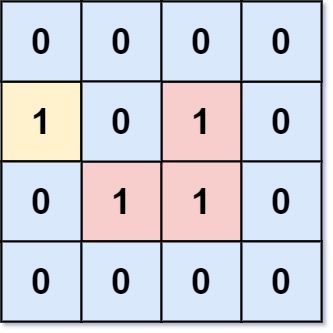

In [3]:
def dfsTraversal(grid, x, y, n, m):
    if x < 0 or x >= n or y < 0 or y >= m or grid[x][y] == 0:
        return
    grid[x][y] = 0

    dfsTraversal(grid, x-1, y, n, m)
    dfsTraversal(grid, x+1, y, n, m)
    dfsTraversal(grid, x, y-1, n, m)
    dfsTraversal(grid, x, y+1, n, m)


def numEnclaves(grid):
    n = len(grid)
    m = len(grid[0])

    for j in range(m):
        dfsTraversal(grid, 0, j, n, m)
        dfsTraversal(grid, n-1, j, n, m)

    for i in range(1, n-1):
        dfsTraversal(grid, i, 0, n, m)
        dfsTraversal(grid, i, m-1, n, m)

    enclaves = 0
    for i in range(n):
        enclaves += sum(grid[i])
    return enclaves
grid = [[0,0,0,0],[1,0,1,0],[0,1,1,0],[0,0,0,0]]
numEnclaves(grid)

3

# Word ladder - 1

In [11]:
def isOneLetter(word1, word2):
    n = len(word1)
    count = 0
    for i in range(n):
        if word1[i] == word2[i]:
            count += 1
        else:
            count += 2
    return count == (n+1) 
   
def bfsTraversal(queue, endWord, wordList, visited):

    n = len(wordList)

    while len(queue) > 0:
        node, steps = queue.pop(0)
        if node == endWord:
            return steps
        for i in range(n):
            if visited[i] == 0 and isOneLetter(node, wordList[i]):
                queue.append((wordList[i], steps+1))
                visited[i] = 1
    return 0


def ladderLength(beginWord, endWord, wordList):

    if endWord not in wordList:
        return 0
    wordList = list(set(wordList))
        
    n = len(wordList)

    queue = []
    visited = [0 for i in range(n)]

    queue.append((beginWord, 1))
    for i in range(n):
        if beginWord == wordList[i]:
            visited[i] = 1

    return bfsTraversal(queue, endWord, wordList, visited)

beginWord = "hit"
endWord = "cog"
wordList = ["hot","dot","dog","lot","log","cog"]
ladderLength(beginWord, endWord, wordList)

5

# Word Ladder - II

In [4]:
def isOneLetter(word1, word2):
    n = len(word1)
    count = 0
    for i in range(n):
        if word1[i] == word2[i]:
            count += 1
        else:
            count += 2
    return count == (n+1)

def bfsTraversal(wordList, queue, endWord, visited):

    n = len(wordList)
    res = []
    while len(queue) > 0:
        size = len(queue)
        for w in range(size):
            path, index = queue.pop(0)
            for i in range(n):
                if visited[i] == 0 and isOneLetter(wordList[i], path[-1]):
                    queue.append((path+[wordList[i]], i))
                    if wordList[i] == endWord:
                        res.append((path+[wordList[i]]))
        if len(res) > 0:
            return res
        size = len(queue)
        for w in range(size):
            path, index = queue[w]
            visited[index] = 1
            
    return []


def findLadders(beginWord, endWord, wordList):
         
    if endWord not in wordList:
        return []

    if beginWord == endWord:
        return [beginWord]

    n = len(wordList)
    visited = [0 for i in range(n+1)]
    x = -1
    for i in range(n):
        if wordList[i] == beginWord:
            x = i
    queue = [ ([beginWord], x) ]
    visited[x] = 1

    return bfsTraversal(wordList, queue, endWord, visited)

beginWord = "hit"
endWord = "cog"
wordList = ["hot","dot","dog","lot","log","cog"]
findLadders(beginWord, endWord, wordList)

[['hit', 'hot', 'dot', 'dog', 'cog'], ['hit', 'hot', 'lot', 'log', 'cog']]

# Number of Distinct Islands

In [7]:
def dfsTraversal(grid, x, y, n, m):
    basex = x
    basey = y
    traversal = ''
    stack = [(x, y)]
    grid[x][y] = 0
    while len(stack)  >0:
        x,y = stack.pop()
        traversal += str(x-basex) + str(y-basey)
        if 0 <= x-1 < n and grid[x-1][y] == 1:
            stack.append((x-1, y))
            grid[x-1][y] = 0
        if  0 <= x+1 < n and grid[x+1][y] == 1:
            stack.append((x+1, y))
            grid[x+1][y] = 0
        if 0 <= y-1 < m and grid[x][y-1] == 1:
            stack.append((x, y-1))
            grid[x][y-1] = 0
        if 0 <= y+1 < m and grid[x][y+1] == 1:
            stack.append((x, y+1))
            grid[x][y+1] = 0
    return traversal
    
def countDistinctIslands(grid):
    # code here
    n = len(grid)
    m = len(grid[0])
    d = {}
    islands = set()
    for i in range(n):
        for j in range(m):
            if grid[i][j] == 1:
                traversal = dfsTraversal(grid, i, j, n, m)
                islands.add(traversal)    
                    
    return len(islands)

grid = [[1, 1, 0, 1, 1],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [1, 1, 0, 1, 1]]
countDistinctIslands(grid)

3

# 	Bipartite Graph (DFS)
- 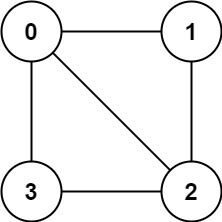

In [11]:
def dfsTraversal(graph, node, parentNode, color, visited):
    if visited[node] != -1:
        return color%2 == visited[node]
        
    visited[node] = color%2

    for n in graph[node]:
        if n != parentNode and dfsTraversal(graph, n, node, color+1, visited) == False:
            return False
    return True


def isBipartite(graph):
        
    v = len(graph)
    visited = [-1 for i in range(v)]

    for node in range(v):
        if visited[node] == -1 and dfsTraversal(graph, node,-1, 0, visited) == False:
            return False
    return True

graph = [[1,2,3],[0,2],[0,1,3],[0,2]]
isBipartite(graph)

False

# Cycle Detection in Directed Graph (DFS)
- 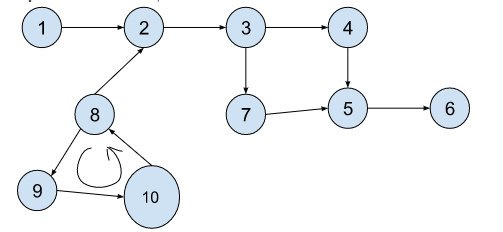

In [26]:
def dfsTraversal(adj, node, visited, pathVisited):
    if pathVisited[node] == 1:
        return True
    visited[node] = 1
    pathVisited[node] = 1
    for n in adj[node]:
        if dfsTraversal(adj, n, visited, pathVisited):
            return True
    pathVisited[node] = 0
    return False

def isCyclic(adj) :
        
    v = len(adj)
    visited = [0 for i in range(v)]
    pathVisited = [0 for i in range(v)]
    for i in range(v):
        if visited[i] == 0 and dfsTraversal(adj, i, visited, pathVisited) :
            return True
                
    return False

adj_List = [[], [2], [3], [4, 7], [5], [6], [], [5], [9], [10], [8]]
isCyclic(adj_List)

True

In [3]:
grid = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]
grid[0][0] = '0'
grid

[['0', '1', '1', '1', '0'],
 ['1', '1', '0', '1', '0'],
 ['1', '1', '0', '0', '0'],
 ['0', '0', '0', '0', '0']]